# Analisi dei dati ed eventuali correzioni

In [ ]:
import pandas as pd
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("./Datasets9.1/bank-additional-full.csv",sep = ";")

andiamo innanzitutto ad effettuare un preprocessing dei dati che ci vengono forniti

# Preprocessing

verifichiamo che non vi siano presenti dei valori null all'interno del nostro dataframe

In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

andiamo a vedere quali sono i valori unici presenti all'interno del dataframe andando anche a vedere se vi sono degli outliers o meno.

In [5]:
for column in df.columns:
    print(column+" unique values:")
    print(df[column].unique())
    print("------------------------------------------------")

age unique values:
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
------------------------------------------------
job unique values:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------------------------
marital unique values:
['married' 'single' 'divorced' 'unknown']
------------------------------------------------
education unique values:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------------------------------------------------
default unique values:
['no' 'unknown' 'yes']
------------------------------------------------
housing unique values:
['no' 'yes' 'unknown']
-------------------------------

sono presenti anche dei valori che risultano sconosciuti, vediamo in quale colonna sono presenti e in che quantità.

In [6]:
cerca_stringa = df.applymap(lambda x: "unknown" in str(x))
cerca_stringa.sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [ ]:
# andiamo ad eliminare tutte le istanze con valori sconosciuti in quanto sarebbe difficile andarli a sostituire

# df = df.drop(df[df.marital == "unknown"].index)
# df = df.drop(df[df.job == "unknown"].index)
# df = df.drop(df[df.education == "unknown"].index)
# df = df.drop(df[df.default == "unknown"].index)
# df = df.drop(df[df.housing == "unknown"].index)
# df = df.drop(df[df.loan == "unknown"].index)

# cerca_stringa = df.applymap(lambda x: "unknown" in str(x))
# cerca_stringa.sum()

dato che abbiamo molte colonne con valori nominali andiamo ad applicare la fattorizzazione che ci permette di portare i valori nominali in variabili numeriche

In [8]:
df['month'] = pd.factorize(df['month'])[0]
df['y'] = pd.factorize(df['y'])[0]
df['poutcome'] = pd.factorize(df['poutcome'])[0]
df['day_of_week'] = pd.factorize(df['day_of_week'])[0]
df['poutcome'] = pd.factorize(df['poutcome'])[0]
df['contact'] = pd.factorize(df['contact'])[0]
df['loan'] = pd.factorize(df['loan'])[0]
df['housing'] = pd.factorize(df['housing'])[0]
df['default'] = pd.factorize(df['default'])[0]
df['education'] = pd.factorize(df['education'])[0]
df['marital'] = pd.factorize(df['marital'])[0]
df['job'] = pd.factorize(df['job'])[0]

inoltre abbiamo delle variabili che risultano avere dei valori negativi o dei valori che hanno un range elevato, possiamo provare a scalare queste variabili per facilitare il nostro classificatore

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df['emp.var.rate'] = scaler.fit_transform(df[['emp.var.rate']])

df['emp.var.rate'].unique()

array([0.9375    , 1.        , 0.6875    , 0.66666667, 0.33333333,
       0.10416667, 0.        , 0.08333333, 0.35416667, 0.47916667])

# Calcolo delle variabili correlate alla variabile target

tramite l'ausilio di una matrice di correlazione andiamo a verificare quali sono le variabili più correlate alla variabile target che abbiamo

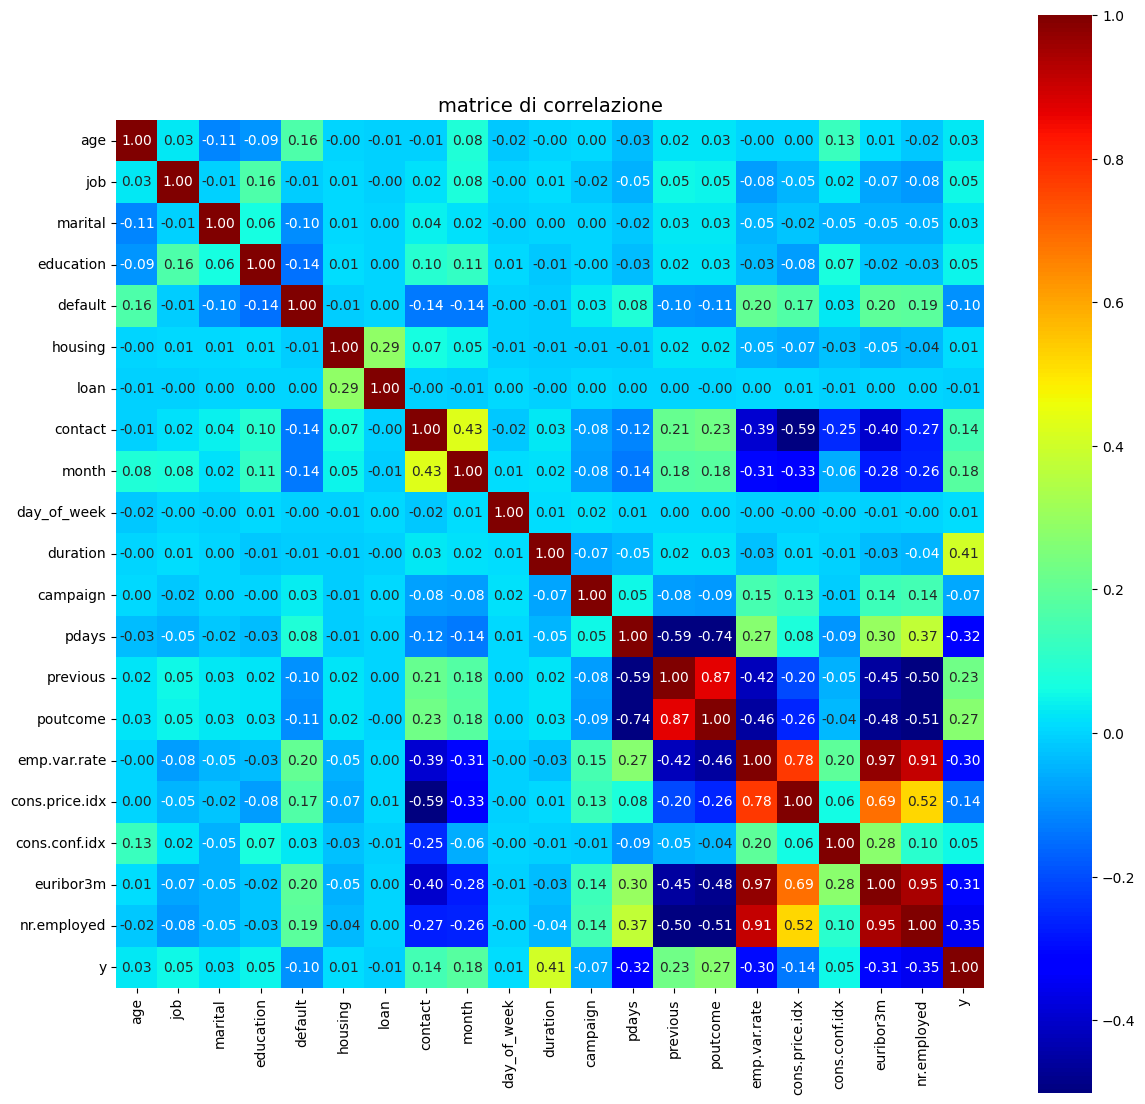

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(14,14))
plot = sns.heatmap(corr_matrix, vmax = 1,square = True, annot=True,fmt=".2f", cmap="jet",robust = True)

plt.title("matrice di correlazione", fontsize = 14)
plt.show()

in questo caso risultano essere correlate alla variabile y, tutte le variabili che presentano un colore dal verde al rosso.

# Processo di Classificazione

##########################################################################
Nearest Neighbors
0.9003398883224083
Accuracy: 0.90
----------------------------------
AUC-ROC score: 0.7233095578906276
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.5760197775030902
----------------------------------
Recall (true positive rate):

0.4936440677966102
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.5316600114090132
----------------------------------
Confusion Matrix:

[[6951  343]
 [ 478  466]]
----------------------------------
Cross accuracy: 0.7611121255080913
Cross precision: 0.5781370758185258
Cross recall: 0.5727137586687976
Cross f_score: 0.5280853538343161


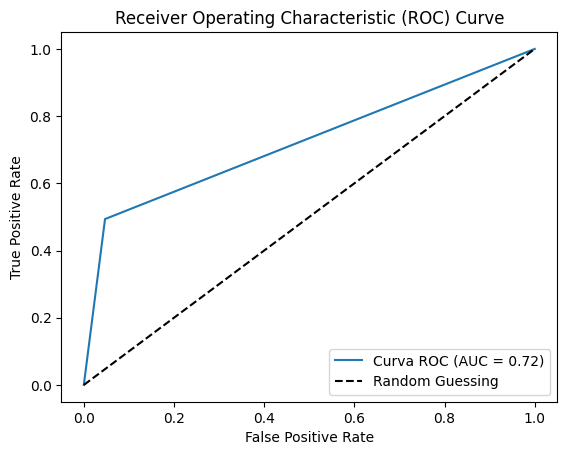

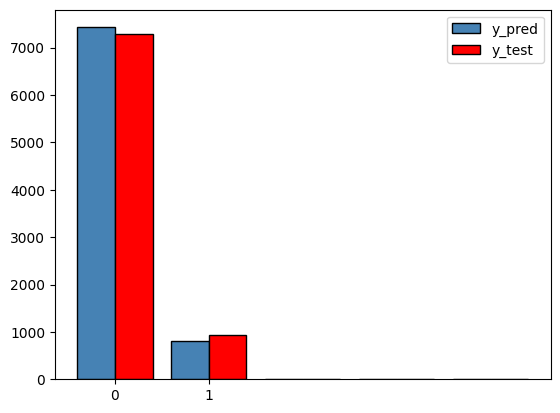

##########################################################################
Decision Tree
0.911750424860403
Accuracy: 0.91
----------------------------------
AUC-ROC score: 0.7463532250793548
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.6378653113087674
----------------------------------
Recall (true positive rate):

0.5317796610169492
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.5800115540150201
----------------------------------
Confusion Matrix:

[[7009  285]
 [ 442  502]]
----------------------------------
Cross accuracy: 0.4646843453512702
Cross precision: 0.533238690660952
Cross recall: 0.3627831164387215
Cross f_score: 0.2991483032566693


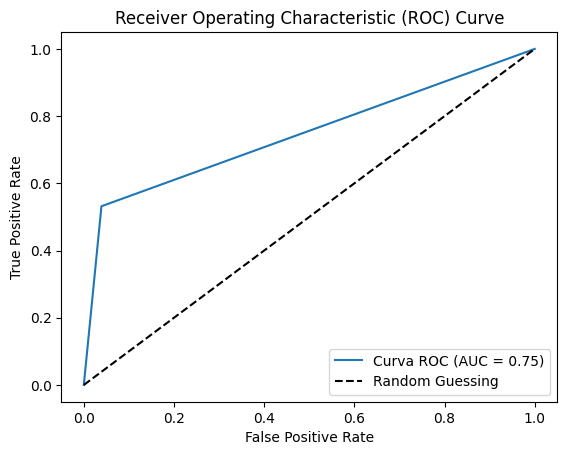

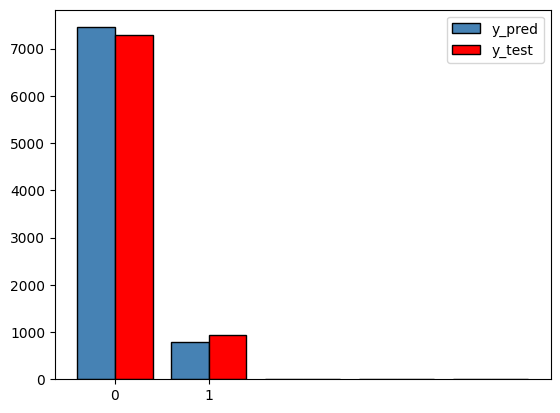

##########################################################################
Random Forest
0.8969410050983249
Accuracy: 0.90
----------------------------------
AUC-ROC score: 0.5724511497725085
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.7486910994764397
----------------------------------
Recall (true positive rate):

0.15148305084745764
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.25198237885462554
----------------------------------
Confusion Matrix:

[[7246   48]
 [ 801  143]]
----------------------------------


C:\Users\renat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\renat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross accuracy: 0.7632715236937246
Cross precision: 0.5697411190319087
Cross recall: 0.5161665206099235
Cross f_score: 0.45591659197353296


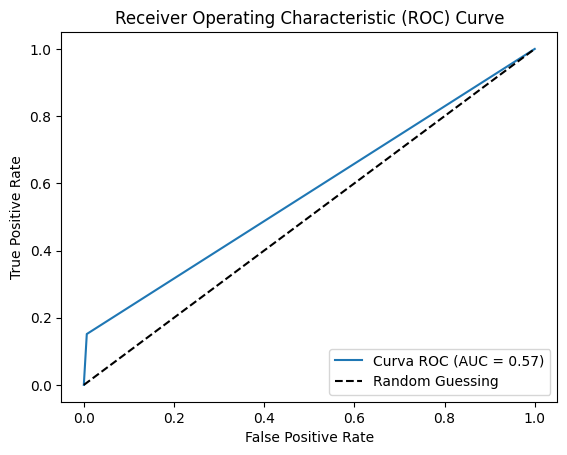

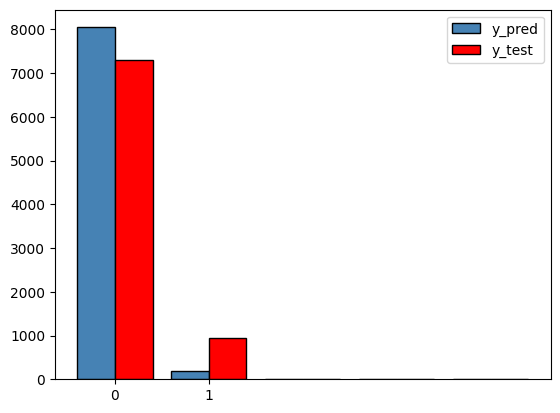

In [11]:
from sklearn.model_selection import train_test_split
# classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB as NB
#metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#cross validation
from sklearn.model_selection import cross_validate


x = df.drop("y",axis=1)
y = df["y"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle = True)

names = ["Nearest Neighbors", "Decision Tree","Random Forest", "Naive Bayes"]
# , "Linear SVM"

classifiers = [KNeighborsClassifier(3),
               # SVC(kernel="linear", C=0.025),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
               #,NB()
              ]

for name, clf in zip(names, classifiers):
    print("##########################################################################")
    print(name)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    print("Accuracy: %0.2f" % accuracy_score(y_test, y_pred))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    print("----------------------------------")
    print("AUC-ROC score:", auc_roc)
    print("----------------------------------")
    
    print("Precision (numero di istanze correttamente predette dal modello):\n")
    precision = precision_score(y_test, y_pred)
    print(precision)
    print("----------------------------------")

    
    print("Recall (true positive rate):\n")
    recall = recall_score(y_test, y_pred)
    print(recall)
    print("----------------------------------")
    
    print("F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):\n")
    f1 = f1_score(y_test, y_pred)
    print(f1)
    print("----------------------------------")
    
    print("Confusion Matrix:\n")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("----------------------------------")
    
    #Eseguo cross-validation per 'migliorare' il classificatore
    scoring = {'precision':'precision_macro', 'recall':'recall_macro', 'f1_score':'f1_macro', 'accuracy':'accuracy'}
    score = cross_validate(clf, x, y, scoring=scoring)
    cross_precision = score['test_precision'].mean()
    cross_accuracy = score['test_accuracy'].mean()
    cross_f_score = score['test_f1_score'].mean()
    cross_recall = score['test_recall'].mean()
    
    #Stampiamo le metriche della cross validation
    print('Cross accuracy:',cross_accuracy)
    print('Cross precision:',cross_precision)
    print('Cross recall:',cross_recall)
    print('Cross f_score:',cross_f_score)

    # Plot the ROC curve
    # plt.plot(fpr, tpr, label='ROC curve')
    # plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    plt.hist([y_pred,y_test],  bins=[0,1,2,3,4,5], label = ["y_pred","y_test"], align = "left",color=['steelblue',"red"], edgecolor='black')
    plt.xticks([0,1])
    plt.yscale("linear")
    plt.legend()
    plt.show()

In [14]:
nuovodf = df.drop("age",axis=1)
nuovodf = df.drop("job",axis=1)
nuovodf = df.drop("marital",axis=1)
nuovodf = df.drop("education",axis=1)
nuovodf = df.drop("housing",axis=1)
nuovodf = df.drop("loan",axis=1)
nuovodf = df.drop("day_of_week",axis=1)
nuovodf = df.drop("cons.conf.idx",axis=1)

##########################################################################
Nearest Neighbors
0.894027676620539
Accuracy: 0.89
----------------------------------
AUC-ROC score: 0.7203015848115013
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.5546511627906977
----------------------------------
Recall (true positive rate):

0.4932781799379524
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.522167487684729
----------------------------------
Confusion Matrix:

[[6888  383]
 [ 490  477]]
----------------------------------
Cross accuracy: 0.7773068028389243
Cross precision: 0.600844530887916
Cross recall: 0.5905884004591713
Cross f_score: 0.5466878845153482


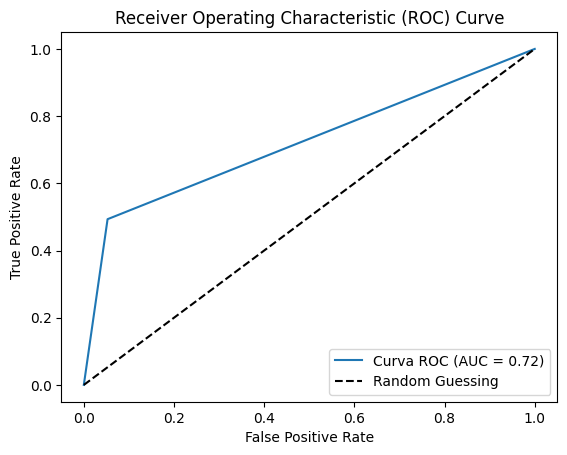

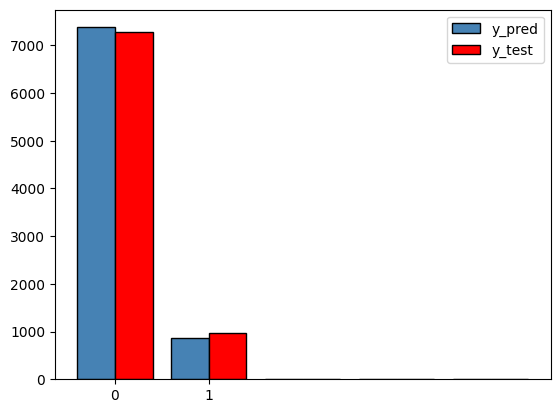

##########################################################################
Decision Tree
0.9088370963826171
Accuracy: 0.91
----------------------------------
AUC-ROC score: 0.7152421748252077
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.6592920353982301
----------------------------------
Recall (true positive rate):

0.4622543950361944
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.5434650455927051
----------------------------------
Confusion Matrix:

[[7040  231]
 [ 520  447]]
----------------------------------
Cross accuracy: 0.4670391414481928
Cross precision: 0.5313048841583515
Cross recall: 0.3591238931263011
Cross f_score: 0.29857824633330676


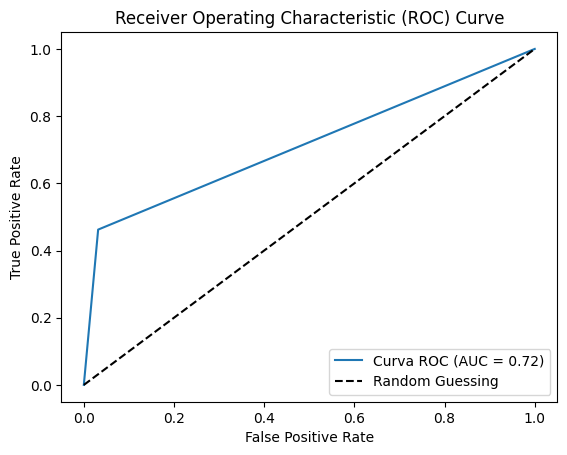

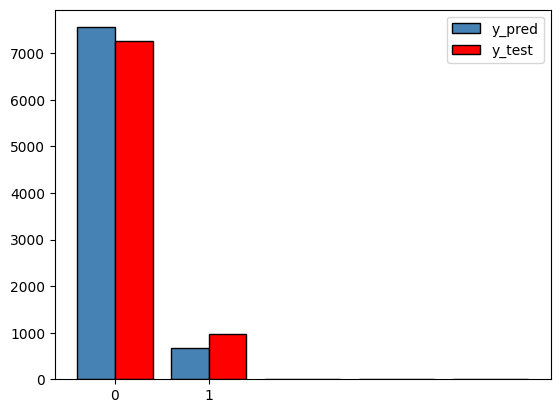

##########################################################################
Random Forest
0.894027676620539
Accuracy: 0.89
----------------------------------
AUC-ROC score: 0.5728119541627952
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.7326732673267327
----------------------------------
Recall (true positive rate):

0.15305067218200621
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.25320786997433703
----------------------------------
Confusion Matrix:

[[7217   54]
 [ 819  148]]
----------------------------------


C:\Users\renat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross accuracy: 0.8011745773862529
Cross precision: 0.5668897515995905
Cross recall: 0.5080782693140043
Cross f_score: 0.47364397816165543


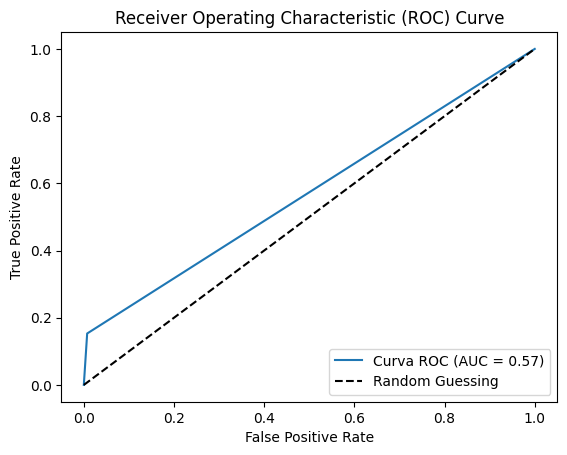

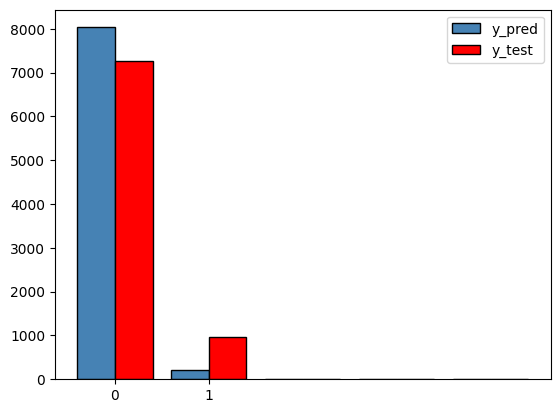

In [15]:
from sklearn.model_selection import train_test_split
# classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB as NB
#metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#cross validation
from sklearn.model_selection import cross_validate


x = nuovodf.drop("y",axis=1)
y = nuovodf["y"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle = True)

names = ["Nearest Neighbors", "Decision Tree","Random Forest", "Naive Bayes"]
# , "Linear SVM"

classifiers = [KNeighborsClassifier(3),
               # SVC(kernel="linear", C=0.025),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
               #,NB()
              ]

for name, clf in zip(names, classifiers):
    print("##########################################################################")
    print(name)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    print("Accuracy: %0.2f" % accuracy_score(y_test, y_pred))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    print("----------------------------------")
    print("AUC-ROC score:", auc_roc)
    print("----------------------------------")
    
    print("Precision (numero di istanze correttamente predette dal modello):\n")
    precision = precision_score(y_test, y_pred)
    print(precision)
    print("----------------------------------")

    
    print("Recall (true positive rate):\n")
    recall = recall_score(y_test, y_pred)
    print(recall)
    print("----------------------------------")
    
    print("F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):\n")
    f1 = f1_score(y_test, y_pred)
    print(f1)
    print("----------------------------------")
    
    print("Confusion Matrix:\n")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("----------------------------------")
    
    #Eseguo cross-validation per 'migliorare' il classificatore
    scoring = {'precision':'precision_macro', 'recall':'recall_macro', 'f1_score':'f1_macro', 'accuracy':'accuracy'}
    score = cross_validate(clf, x, y, scoring=scoring)
    cross_precision = score['test_precision'].mean()
    cross_accuracy = score['test_accuracy'].mean()
    cross_f_score = score['test_f1_score'].mean()
    cross_recall = score['test_recall'].mean()
    
    #Stampiamo le metriche della cross validation
    print('Cross accuracy:',cross_accuracy)
    print('Cross precision:',cross_precision)
    print('Cross recall:',cross_recall)
    print('Cross f_score:',cross_f_score)

    # Plot the ROC curve
    # plt.plot(fpr, tpr, label='ROC curve')
    # plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    plt.hist([y_pred,y_test],  bins=[0,1,2,3,4,5], label = ["y_pred","y_test"], align = "left",color=['steelblue',"red"], edgecolor='black')
    plt.xticks([0,1])
    plt.yscale("linear")
    plt.legend()
    plt.show()